Цель проекта - отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

в рамках проекта будет разработана модель, предсказывающая ы результаты госэкзамена по математике для каждого ученика школы . В рамках работы нам предстоит провести разведывательный анализ данных, включающий:
- очистку данных и утсранение выбросов
- кореляционный анализ числовых параметров
- анализ справочников(не числовых параметров)
- выбор полей, которые будут использованы для построения модели

анализирется датасет с данными об учащихся нескольких школ , содержащий следующие поля:
1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import t
from scipy.stats import norm
from statsmodels.stats import weightstats as ws

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('stud_math.csv')
display(stud)
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

# Изучим итоговое поле score

In [119]:
# из общей информации видно , что поле содержит 6 пустых значений.  посмотрим что это.
stud[stud.score.isnull()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
201,GP,F,16,U,GT3,T,2.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,yes,yes,NaN,yes,yes,-6.0,yes,no,no,4.0,NaN,3.0,4.0,6.0,NaN
244,GP,F,18,U,GT3,T,2.0,1.0,other,other,course,other,2.0,3.0,0.0,no,yes,yes,no,no,-9.0,yes,yes,yes,4.0,4.0,4.0,3.0,0.0,NaN
270,GP,F,19,NaN,GT3,T,3.0,3.0,other,services,home,other,1.0,2.0,2.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,3.0,5.0,5.0,NaN,NaN
283,GP,F,18,U,GT3,T,1.0,1.0,other,other,home,mother,2.0,2.0,0.0,yes,NaN,no,yes,yes,-6.0,yes,yes,no,5.0,NaN,4.0,4.0,4.0,NaN
312,GP,M,19,U,GT3,T,1.0,2.0,other,services,course,other,1.0,2.0,1.0,no,no,no,no,no,-6.0,yes,yes,no,4.0,5.0,NaN,4.0,3.0,NaN
350,MS,M,19,NaN,GT3,T,1.0,1.0,other,services,home,other,3.0,2.0,3.0,no,no,no,no,NaN,-6.0,yes,yes,no,5.0,4.0,4.0,2.0,8.0,NaN


In [120]:
# воспроизвести их не удастся , поэтому убираем строки из выборки и не будем тратить время на вычистку остальных полей по этим строкам
stud = stud[stud.score.isnull() == False]

<AxesSubplot:>

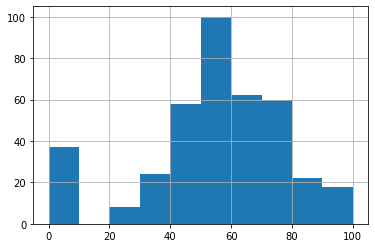

In [121]:
# рассмотрим распределение score и выбросы из него
stud.score.hist()

C:\Users\iokopniy\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='score'>

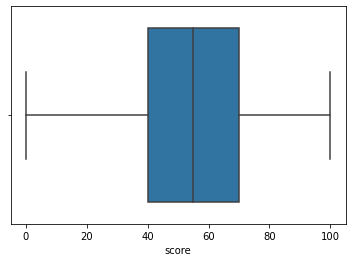

In [122]:
sns.boxplot(stud.score)

In [123]:
# видим, что есть выброс из низких значений, рассмотрим подробнее
stud[stud.score < 10]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
128,GP,M,18,R,NaN,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,-3.0,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
130,GP,F,15,R,GT3,T,3.0,4.0,services,teacher,course,father,2.0,3.0,2.0,no,yes,no,no,yes,-9.0,yes,yes,yes,4.0,2.0,2.0,5.0,0.0,0.0
131,GP,F,15,U,GT3,NaN,1.0,1.0,at_home,other,course,mother,3.0,1.0,0.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
134,GP,M,15,R,GT3,T,3.0,4.0,at_home,teacher,course,mother,NaN,2.0,0.0,no,yes,no,no,yes,-6.0,yes,no,yes,5.0,3.0,3.0,5.0,0.0,0.0
135,GP,F,15,U,GT3,T,4.0,4.0,services,NaN,course,mother,1.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,yes,4.0,3.0,3.0,5.0,0.0,0.0
136,GP,M,17,R,GT3,T,3.0,4.0,at_home,other,course,mother,3.0,2.0,0.0,no,no,NaN,no,yes,-6.0,yes,no,no,NaN,4.0,5.0,5.0,0.0,0.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,NaN,father,2.0,4.0,0.0,yes,yes,no,NaN,yes,-12.0,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
144,GP,M,17,U,GT3,T,2.0,1.0,other,other,home,NaN,1.0,1.0,3.0,no,yes,no,no,yes,-3.0,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0
146,GP,F,15,U,GT3,T,3.0,2.0,health,services,home,father,1.0,2.0,3.0,no,NaN,no,no,yes,-6.0,yes,yes,no,3.0,3.0,2.0,3.0,0.0,0.0


In [124]:
# видим, что это нулевые значения.
# В случае оценки экзамена с оченкой по 100 бальной шкале это веротянее всего тоже разновидность пустых значений.
# Уберем эти строки из рассмотрения.
stud = stud[(stud.score < 10) == False]

In [125]:
# рассмотрим получившуюся выборку
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               352 non-null    object 
 1   sex                  352 non-null    object 
 2   age                  352 non-null    int64  
 3   address              338 non-null    object 
 4   famsize              328 non-null    object 
 5   Pstatus              311 non-null    object 
 6   Medu                 350 non-null    float64
 7   Fedu                 331 non-null    float64
 8   Mjob                 335 non-null    object 
 9   Fjob                 320 non-null    object 
 10  reason               337 non-null    object 
 11  guardian             323 non-null    object 
 12  traveltime           329 non-null    float64
 13  studytime            345 non-null    float64
 14  failures             332 non-null    float64
 15  schoolsup            343 non-null    obj

# Числовые поля и кореляция

<AxesSubplot:>

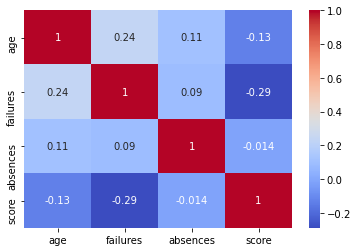

In [126]:
num = ['age', 'failures', 'absences', 'score']
sns.heatmap(stud[num].corr(), annot=True, cmap='coolwarm')

поле absences не коллелирует с результатом, удалим

In [127]:
stud.drop('absences', inplace=True, axis=1)

# Поле Age


16    96
17    90
15    76
18    69
19    16
20     3
22     1
21     1
Name: age, dtype: int64


<AxesSubplot:>

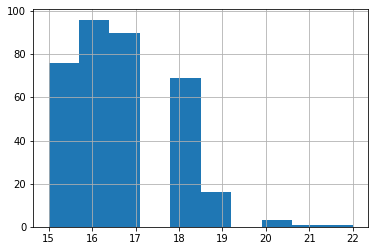

In [129]:
# в поле нет пустых значений , значит нам надо понять только номенклатуру оставшихся значений
print(stud.age.value_counts())
stud.age.hist()

C:\Users\iokopniy\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

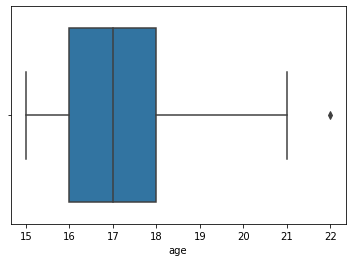

In [130]:
sns.boxplot(stud.age)

In [131]:
# совсестим этот выброс с значением 21
stud.loc[stud[stud.age == 22].index, 'age'] = 21

# Поле failures


<AxesSubplot:>

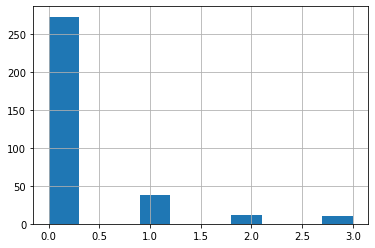

In [132]:
# рассмотрим распределение
stud.failures.hist()

In [133]:
# рассмотрим пустые значения поля failures
stud[stud.failures.isnull()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,score
21,GP,M,15,U,GT3,T,4.0,NaN,health,health,other,father,1.0,1.0,NaN,no,yes,NaN,no,yes,-3.0,yes,yes,no,5.0,4.0,2.0,5.0,75.0
48,GP,M,15,U,GT3,T,4.0,2.0,teacher,other,home,mother,1.0,2.0,NaN,no,yes,yes,no,yes,-6.0,NaN,no,no,4.0,3.0,3.0,5.0,70.0
54,GP,F,15,U,LE3,NaN,3.0,3.0,NaN,other,other,mother,1.0,1.0,NaN,no,no,yes,NaN,yes,-3.0,yes,yes,NaN,5.0,3.0,4.0,1.0,65.0
68,GP,F,15,R,LE3,T,2.0,2.0,health,NaN,reputation,mother,NaN,2.0,NaN,yes,yes,NaN,no,yes,-6.0,yes,yes,no,4.0,1.0,3.0,4.0,40.0
91,GP,F,15,U,GT3,T,4.0,3.0,services,other,reputation,mother,1.0,NaN,NaN,no,no,yes,yes,yes,NaN,yes,yes,no,4.0,5.0,5.0,1.0,90.0
107,GP,M,16,U,GT3,T,3.0,3.0,services,NaN,home,father,1.0,3.0,NaN,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,3.0,3.0,5.0,90.0
108,GP,M,15,R,GT3,NaN,4.0,4.0,other,other,home,father,4.0,4.0,NaN,no,yes,yes,yes,yes,-12.0,yes,yes,yes,1.0,3.0,5.0,1.0,65.0
114,GP,M,15,R,NaN,T,2.0,1.0,health,services,reputation,mother,1.0,2.0,NaN,no,no,no,yes,yes,-6.0,yes,yes,yes,5.0,4.0,2.0,5.0,45.0
115,GP,M,16,U,GT3,T,4.0,4.0,teacher,teacher,course,father,1.0,2.0,NaN,no,yes,no,yes,yes,-6.0,yes,NaN,no,5.0,4.0,4.0,5.0,80.0
125,GP,M,15,U,GT3,T,3.0,4.0,services,services,home,father,1.0,1.0,NaN,yes,no,no,no,yes,-3.0,yes,NaN,no,5.0,5.0,5.0,5.0,60.0


значений достаточно много, не хочется их терять. Давайте посмотрим на что похоже распределение score строк  с пустыми значениями Failure 
и сравним это распределение расспределением score для двух крайних не пустых значений - 0 и 3

<AxesSubplot:>

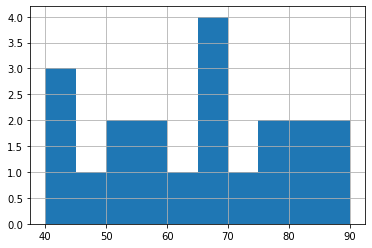

In [134]:
stud[stud.failures.isnull()].score.hist()

<AxesSubplot:>

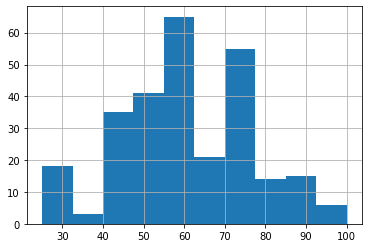

In [135]:
stud[stud.failures == 0].score.hist()

<AxesSubplot:>

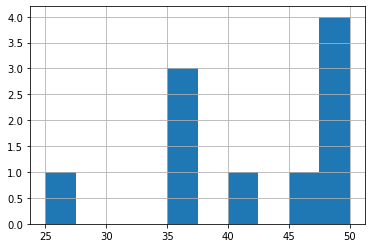

In [136]:
stud[stud.failures == 3].score.hist()

видим, что распределение похоже на выборку с failures=0, можно предположить что пустые значения - это часть выборки с значением 0. 
присвоим значение 0 всем пустым значениям failures


In [148]:
stud.loc[stud[stud.failures.isnull()].index, 'failures'] = 0

посмотрим, изменилась ли кореляция failures и score

<AxesSubplot:>

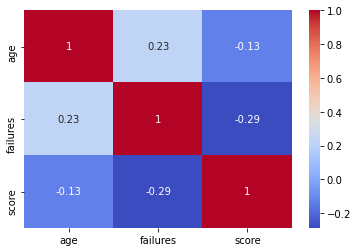

In [138]:
sns.heatmap(stud[['age', 'failures', 'score']].corr(),
            annot=True, cmap='coolwarm')

кореляция не изменилась , ситуацию мы не ухудшили.

# Анализ номинативных переменных

In [139]:
# поля 'studytime' и 'studytime, granular' полностью корелируют между собой
stud[['studytime', 'studytime, granular']].corr()

,studytime,"studytime, granular"
studytime,1.0,-1.0
"studytime, granular",-1.0,1.0


In [140]:
# удалим studytime, granular
stud.drop('studytime, granular', inplace=True, axis=1)

<ipython-input-141-ff7bb0832f45>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = (14, 4))


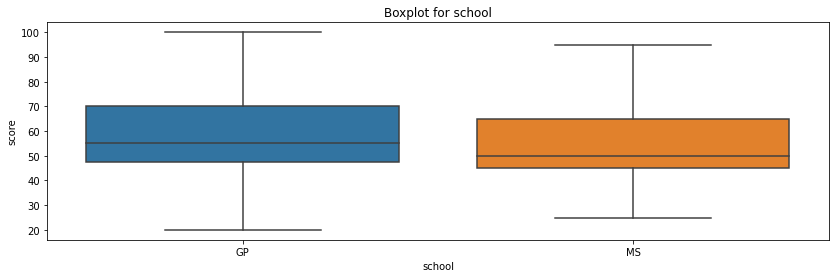

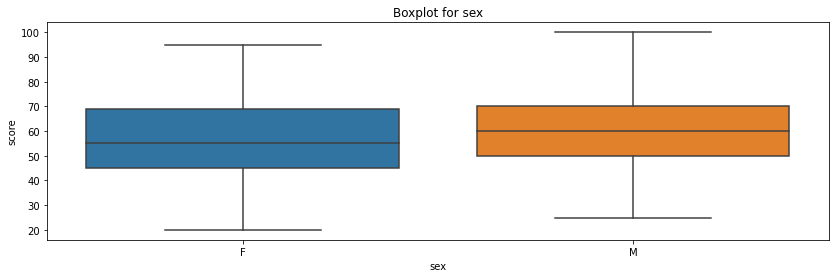

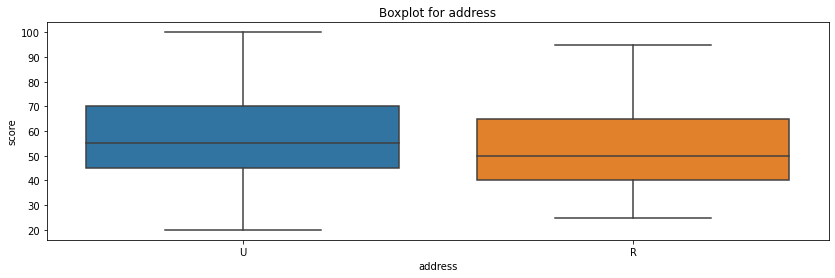

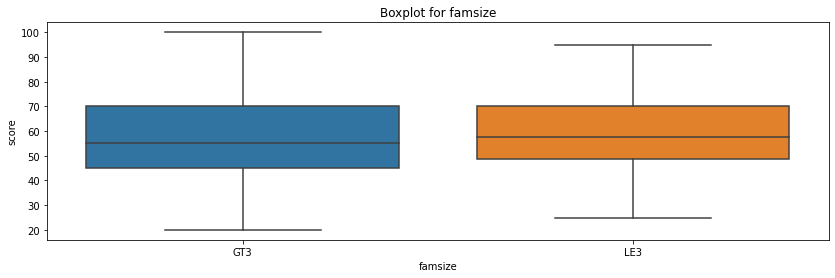

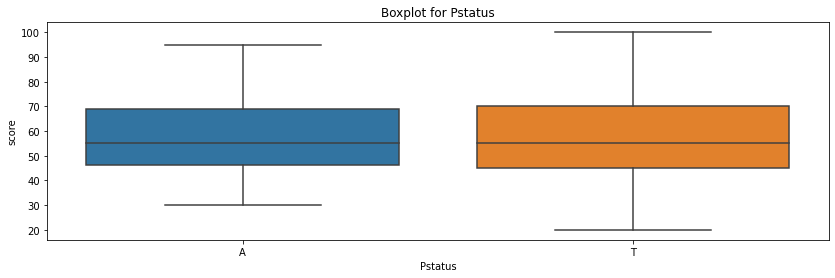

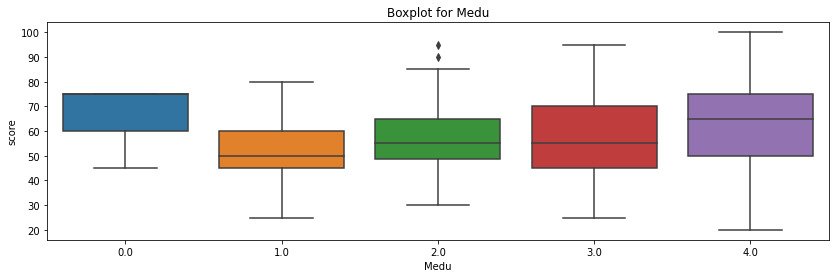

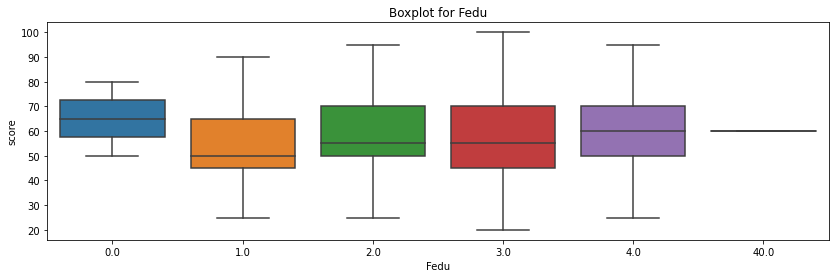

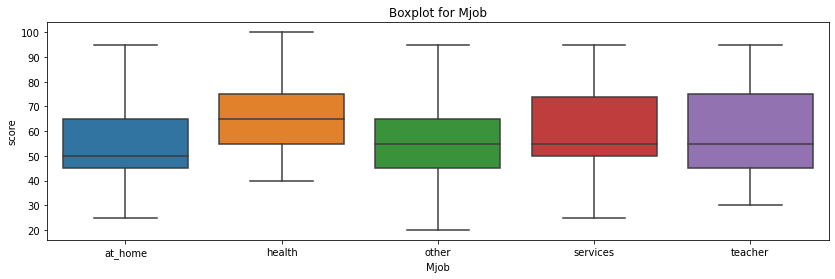

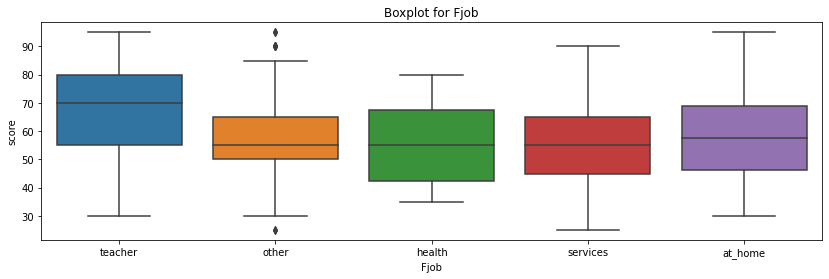

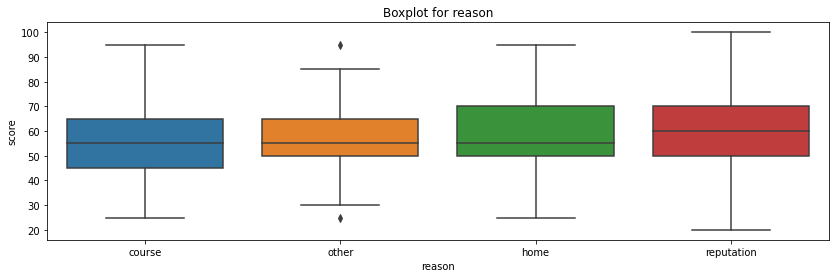

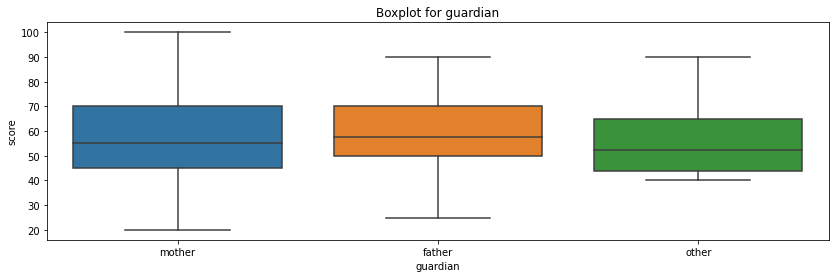

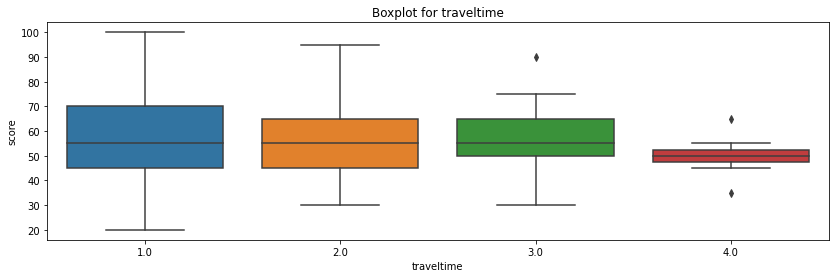

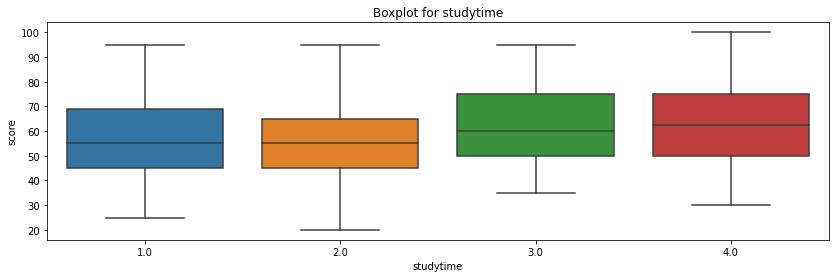

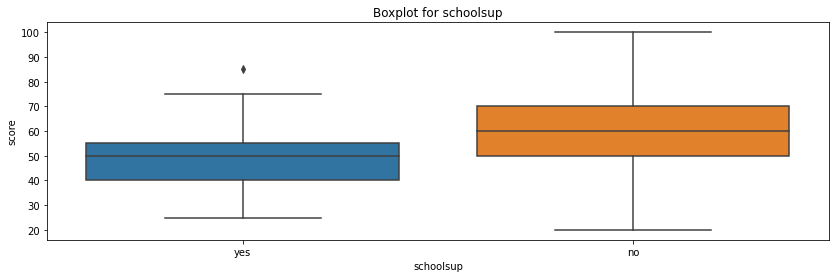

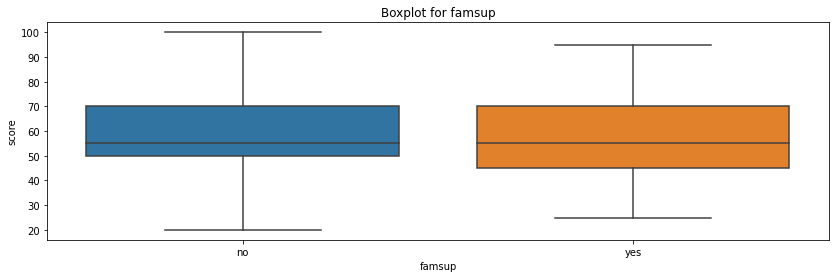

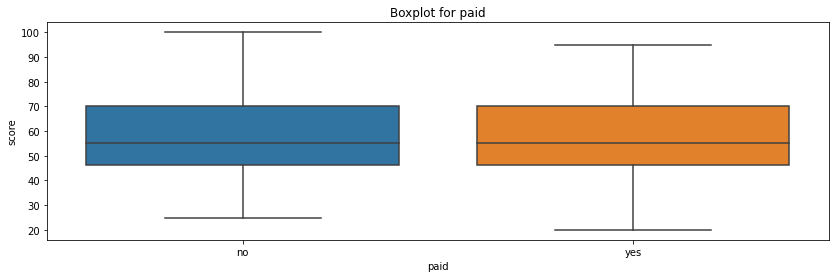

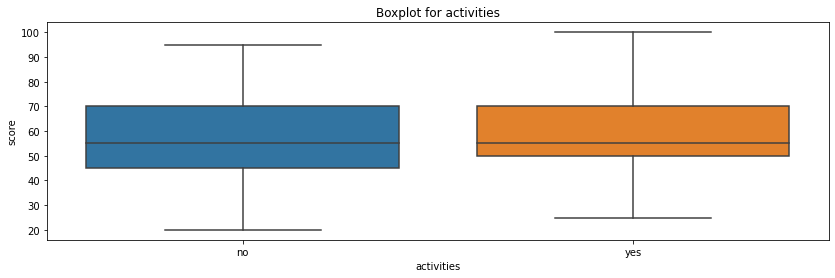

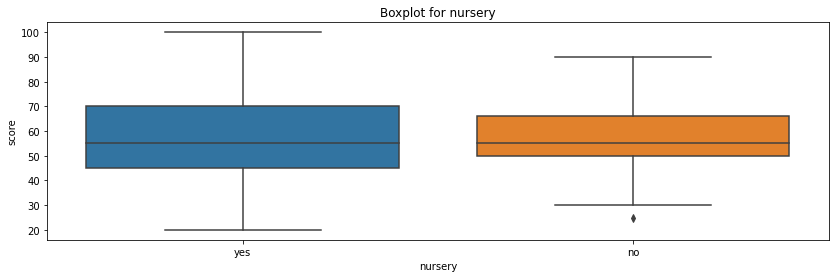

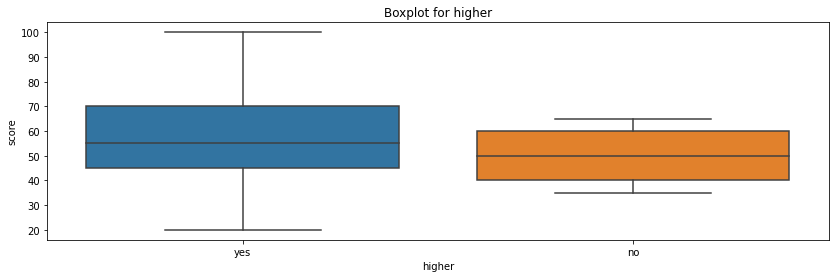

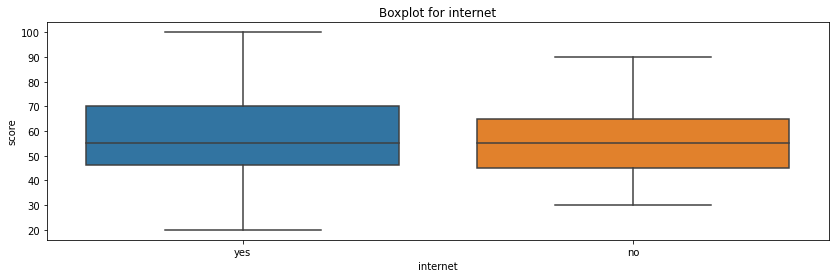

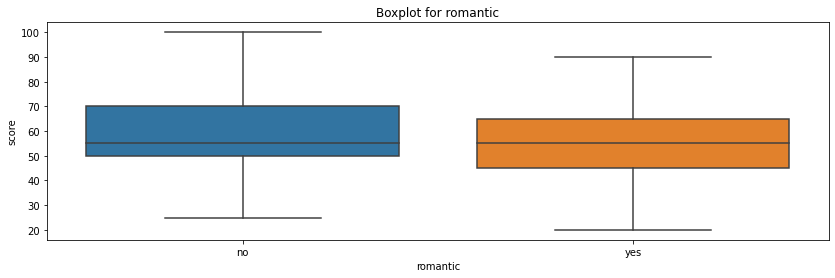

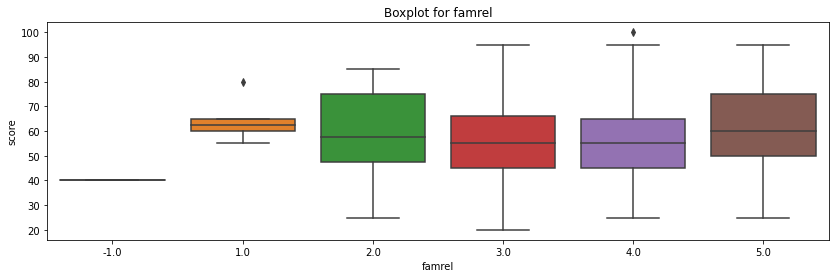

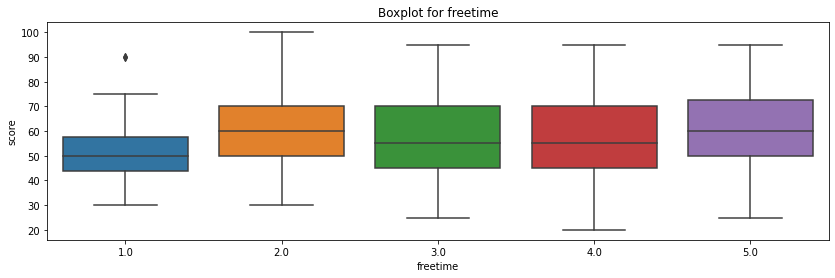

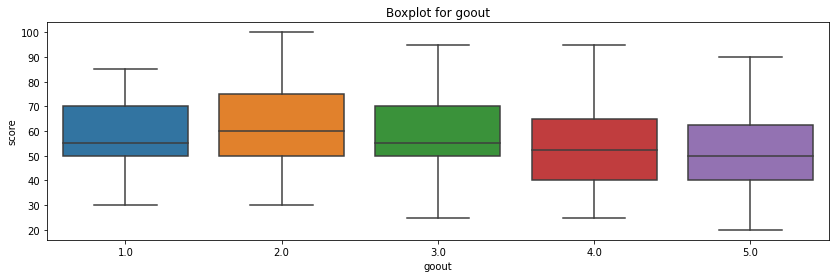

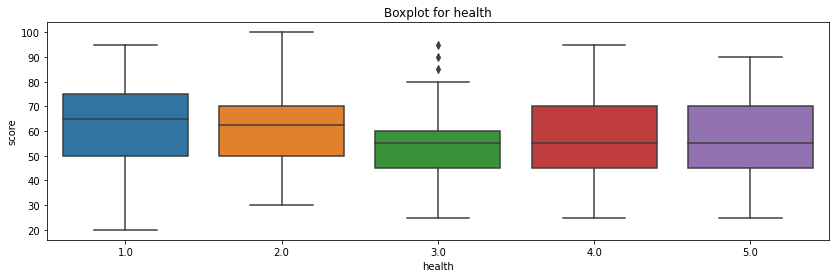

In [141]:
# построим графики, показывающие влияние справочных полей на итоговый бал
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score', data=stud)
    ax.set_title('Boxplot for ' + column)


dicts = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
         'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
         'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
         'health']
for col in dicts:
    get_boxplot(col)

Из графиков видно , что на оценки влияют следующие параметры:
    1) образование родителей
    2) место работы родителей
    3) школьная поддержка
    4) собирается ли ребенок получать высшее образование
    5) свободное время 
    6) и общение с друзьями
    
    также мы видим выбросы в полях Fedu (образование отца) и famrel (отношения в семье), которые надо исправить перед переходом к статистическим методам анализа 
    

In [142]:
# уберем выброс из поля Fedu
stud.loc[stud[stud.Fedu == 40].index, 'Fedu'] = None

In [143]:
# по записи нельзя однозначно восстановить в какой группе значений можно отнести эту строку
stud[stud.famrel == -1]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,score
25,GP,F,16,U,GT3,NaN,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,yes,yes,no,-1.0,2.0,2.0,5.0,40.0


In [144]:
# предлагется убрать значение из рассмотрения
stud.loc[stud[stud.famrel == -1].index, 'famrel'] = None

Теперь проверим гипотезу о том , что записи , содержащие разные значения в полях ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu','Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery','higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout','health'] имеют удинаковый бал.  Для этого воспользуемся проверкой Стюдента

In [145]:
def combis(column):
    cols = stud.loc[:, column].value_counts().index
    combos = list(combinations(cols, 2))
    for i in combos:
        #print (stud.loc[stud.loc[:,column]==i[0],'score'])
        if ws.ttest_ind(stud.loc[stud.loc[:, column] == i[0], 'score'], stud.loc[stud.loc[:, column] == i[1], 'score'], usevar='unequal')[1] <= (0.05/len(combos)):
            print(column, '- значимое для итогового балла поле')
            break


for k in dicts:
    combis(k)

address - значимое для итогового балла поле
Medu - значимое для итогового балла поле
Fedu - значимое для итогового балла поле
Mjob - значимое для итогового балла поле
studytime - значимое для итогового балла поле
schoolsup - значимое для итогового балла поле
higher - значимое для итогового балла поле
goout - значимое для итогового балла поле


#удалим лишние поля

In [146]:
stud.drop(['school', 'sex',  'famsize', 'Pstatus',  'reason', 'guardian', 'traveltime',  'famsup', 'paid',
           'activities', 'nursery', 'internet', 'romantic', 'famrel', 'freetime', 'health'], inplace=True, axis=1)

In [147]:
# Посмотрим финальный data set
display(stud)

,age,address,Medu,Fedu,Mjob,Fjob,studytime,failures,schoolsup,higher,goout,score
0,18,U,4.0,4.0,at_home,teacher,2.0,0.0,yes,yes,4.0,30.0
1,17,U,1.0,1.0,at_home,other,2.0,0.0,no,yes,3.0,30.0
2,15,U,1.0,1.0,at_home,other,2.0,3.0,yes,yes,2.0,50.0
3,15,U,4.0,2.0,health,NaN,3.0,0.0,no,yes,2.0,75.0
4,16,U,3.0,3.0,other,other,2.0,0.0,no,yes,2.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,U,2.0,2.0,services,services,2.0,2.0,no,yes,4.0,45.0
391,17,U,3.0,1.0,services,services,1.0,0.0,no,yes,5.0,80.0
392,21,R,1.0,1.0,other,other,1.0,3.0,NaN,NaN,3.0,35.0
393,18,R,3.0,2.0,services,other,1.0,0.0,no,yes,1.0,50.0


# Выводы:
1) данные достаточно хорошего качества с минимальным количеством выбросов и пропусков.
2) В данному случае пропуски заполнять смысла нет т.к. :
   - востановить по другим данным их достоверно нельзя
   - сами они однородны (NaN) и фильтруются по признаку isnull(). По согласованию с ментором, было принято решение о не изменении значений NaN
3) удалось выявить достаточно небольшое количество полей , влияющих на итоговый бал